### ARIMA Model

<img src="flowchart.png", width=500, height=250, align="Left"></img>
<br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br><br>
<p><b>Source: </b>https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/</p>

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import warnings
warnings.filterwarnings('ignore')
rcParams['figure.figsize'] = 15, 6

### Data

In [18]:
# get data in dataframe
data = pd.read_excel("avril-juin.xls", sheetname=0)
data = data.drop_duplicates(subset=['Number'], keep='first')

In [19]:
data = data[['Date','Number']]

In [7]:
df = data.groupby(['Date']).size()

In [20]:
df.head(2)

Date
2017-04-04    64
2017-04-05    71
dtype: int64

In [21]:
df.index

DatetimeIndex(['2017-04-04', '2017-04-05', '2017-04-06', '2017-04-13',
               '2017-04-14', '2017-04-15', '2017-04-16', '2017-04-17',
               '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21',
               '2017-04-22', '2017-04-23', '2017-04-24', '2017-04-25',
               '2017-04-26', '2017-04-27', '2017-04-28', '2017-04-29',
               '2017-04-30', '2017-05-04', '2017-05-05', '2017-05-06',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-22', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27', '2017-05-29', '2017-05-30',
               '2017-05-31', '2017-06-04', '2017-06-05', '2017-06-06',
               '2017-06-13', '2017-06-14', '2017-06-15', '2017-06-16',
               '2017-06-17', '2017-06-18', '2017-06-19', '2017-06-20',
               '2017-06-21', '2017-06-22', '2017-06-23', '2017-06-24',
      

In [22]:
df.head()

Date
2017-04-04    64
2017-04-05    71
2017-04-06    17
2017-04-13    48
2017-04-14    53
dtype: int64

+ We can extract specific dates that we want

In [24]:
df['2017-04']

Date
2017-04-04    64
2017-04-05    71
2017-04-06    17
2017-04-13    48
2017-04-14    53
2017-04-15    51
2017-04-16    26
2017-04-17    56
2017-04-18    68
2017-04-19    62
2017-04-20    60
2017-04-21    52
2017-04-22    55
2017-04-23    22
2017-04-24    68
2017-04-25    56
2017-04-26    61
2017-04-27    58
2017-04-28    57
2017-04-29    72
2017-04-30    14
dtype: int64

+ Get the range of data we want

In [25]:
df = df['2017-04-01':'2017-07-01'] #cleaning data from other months than said in the data sheet 

In [30]:
df.head()


Date
2017-04-04    64
2017-04-05    71
2017-04-06    17
2017-04-13    48
2017-04-14    53
dtype: int64

### 1. Visualize the Time-Series

+ Visualiztion with Pygal

<b>Source:</b> BigData Science & Analytics - A HandsOn Approach Arshdeep Bahga & Vijay Madisetti

In [42]:
import pygal

#plt.plot(df.index.to_pydatetime(), df.values)
line_chart = pygal.Line(fill=True)

#Labels
line_chart.x_title = 'Days'
line_chart.y_title = 'Sales'
line_chart.title = 'Sales From April to Juin (2017)'

#populate chart
line_chart.x_labels = df.index
line_chart.add('Sales', df.values)

<img src="chart.PNG", width=700, height=250, align="Left"></img>

### Dickey-Fuller Test


Determine whether a time series is stationary

<p><b>Source:</b> https://datascience.ibm.com/exchange/public/entry/view/815137c868b916821dec777bdc23013c</p>
<b>Source:</b> https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [48]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

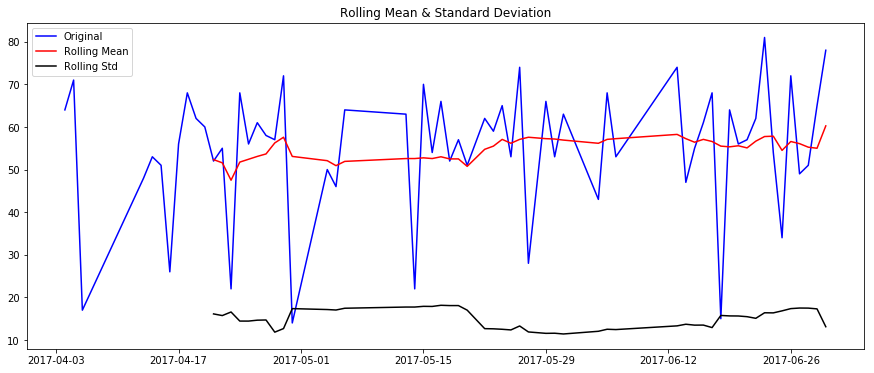

Results of Dickey-Fuller Test:
Test Statistic                -1.003848e+01
p-value                        1.518321e-17
#Lags Used                     0.000000e+00
Number of Observations Used    6.100000e+01
Critical Value (5%)           -2.910236e+00
Critical Value (1%)           -3.542413e+00
Critical Value (10%)          -2.592745e+00
dtype: float64


In [49]:
test_stationarity(df)

<b>Goal</b>: The mean and variance of the series not to be a function of time but rather a constant.

### 2. Make Time Series Stationary

+ Transformation

<b>Source:</b>https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

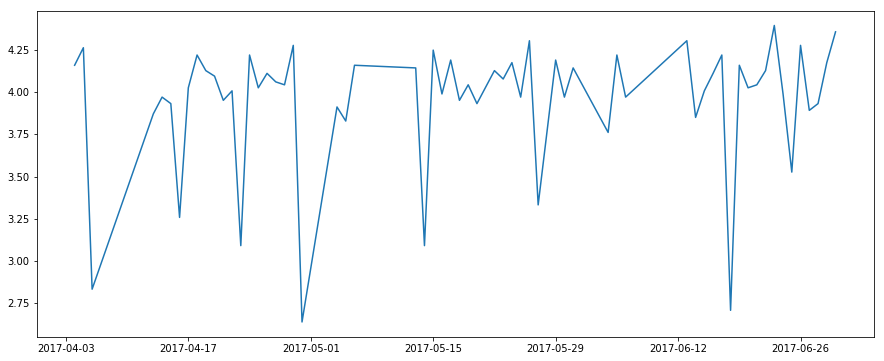

In [50]:
ts_log = np.log(df)
plt.plot(ts_log)

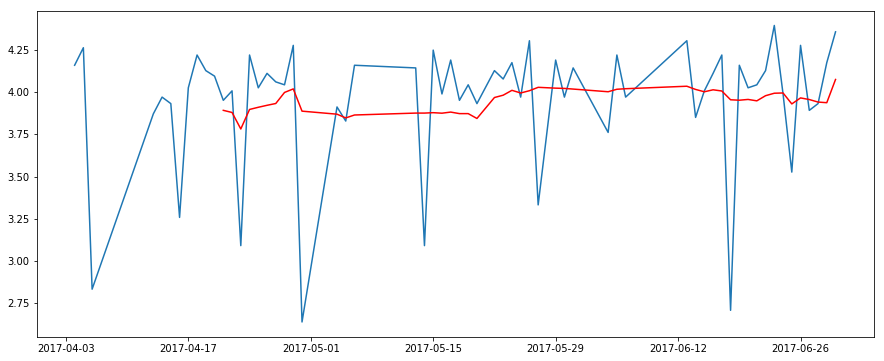

In [51]:
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [52]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2017-04-04         NaN
2017-04-05         NaN
2017-04-06         NaN
2017-04-13         NaN
2017-04-14         NaN
2017-04-15         NaN
2017-04-16         NaN
2017-04-17         NaN
2017-04-18         NaN
2017-04-19         NaN
2017-04-20         NaN
2017-04-21    0.059263
dtype: float64

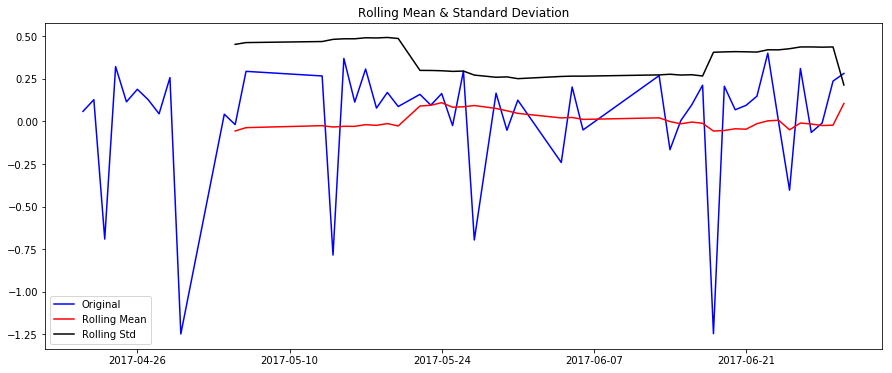

Results of Dickey-Fuller Test:
Test Statistic                -9.231543e+00
p-value                        1.673156e-15
#Lags Used                     0.000000e+00
Number of Observations Used    5.000000e+01
Critical Value (5%)           -2.921360e+00
Critical Value (1%)           -3.568486e+00
Critical Value (10%)          -2.598662e+00
dtype: float64


In [53]:
# droping NAN
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series.


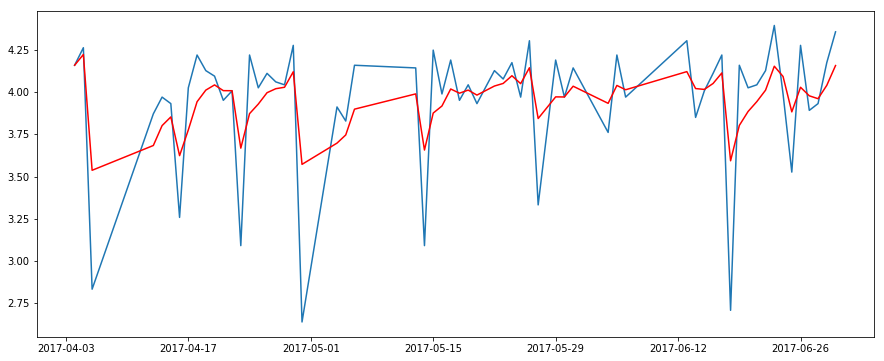

In [54]:
expwighted_avg = pd.ewma(ts_log, halflife=1.5)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

The <b>halflife</b> parameter defines the amount of exponential decay - varies per experiment

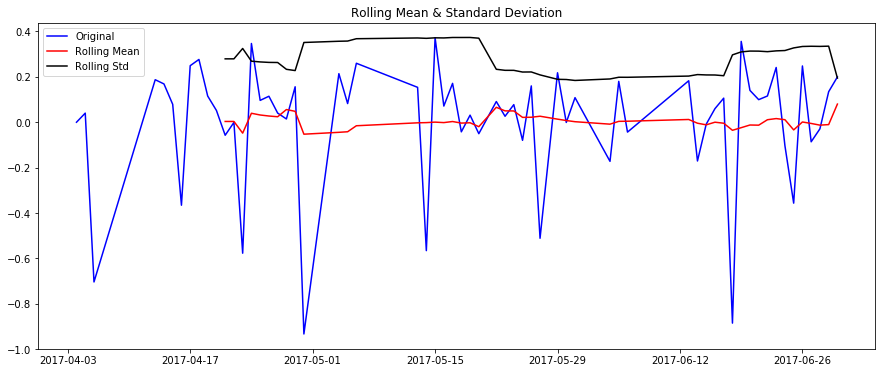

Results of Dickey-Fuller Test:
Test Statistic                 -5.591182
p-value                         0.000001
#Lags Used                      5.000000
Number of Observations Used    56.000000
Critical Value (5%)            -2.914731
Critical Value (1%)            -3.552928
Critical Value (10%)           -2.595137
dtype: float64


In [55]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

## Eliminating Trend and Seasonality

<b>Source:</b> https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

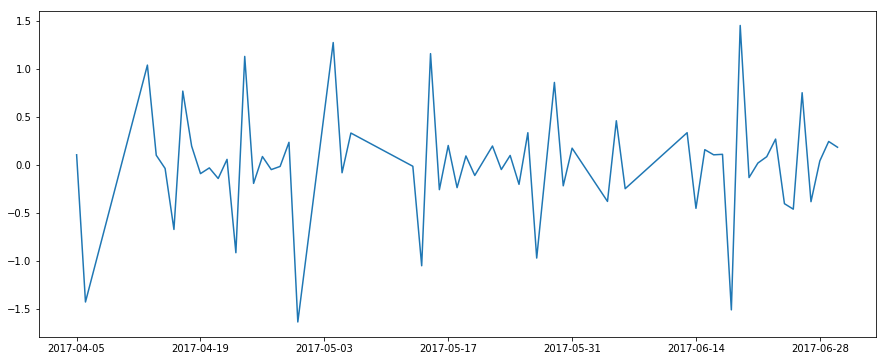

In [56]:
# difference of logs 
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

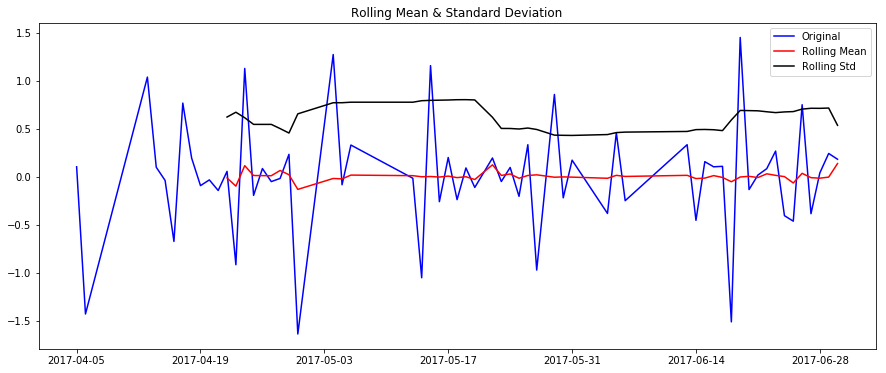

Results of Dickey-Fuller Test:
Test Statistic                 -5.540980
p-value                         0.000002
#Lags Used                      6.000000
Number of Observations Used    54.000000
Critical Value (5%)            -2.916770
Critical Value (1%)            -3.557709
Critical Value (10%)           -2.596222
dtype: float64


In [57]:
# dropping NA
ts_log_diff.dropna(inplace=True)
#test stationary 
test_stationarity(ts_log_diff)

The <b>mean</b> and <b>standard deviation</b> of the time series varies even less.
<p>Results: Time series is now very close to stationary</p>

## Forecasting a Time Series (ARIMA Model)

<p><b>ARIMA</b>: Auto-Regressive Integrated Moving Averages.</p>
The ARIMA forecasting is like a linear equation. 
The predictors depend on the parameters (p,d,q) of the ARIMA model

### 3. Plot ACF and PACF

<p><b>Autocorrelation Function (ACF)</b>: Correlation between the time series with a lagged version of itself.</p>
Example: compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ for a lag equal to 5 
<p><b>Partial Autocorrelation Function (PACF)</b>: Ccorrelation between the time series with a lagged version of itself but after eliminating the variations by previous lags - Removes the effects explained by lags 1 to 4 at lag 5)</p>

<p><b>Source:</b>https://github.com/seanabu/seanabu.github.io/blob/master/Seasonal_ARIMA_model_Portland_transit.ipynb</p>
<b>Source:</b> https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [58]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [59]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5,1,u'Autocorrelation Function')

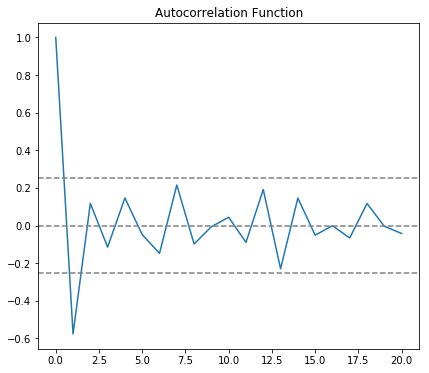

In [60]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

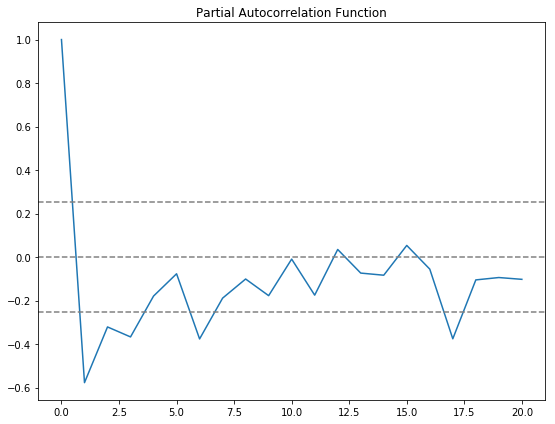

In [61]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

###### Values for p and q:
p: The lag value where the PACF drops to 0 for the first time. (p=1)
<p>q: The lag value where the ACF chart crosses the upper confidence interval for the first time. (q=1)</p>

### 4. Build ARIMA Model

+ AR Model

Text(0.5,1,u'RSS: 9.3820')

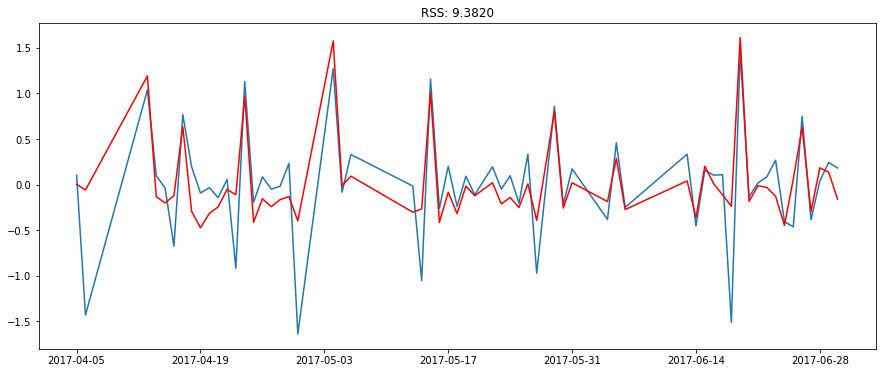

In [70]:
#The variables chosen to build the arim models (0,1,1) come from the two plots ACF and PACF
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, order=(1, 1, 1))  
results_AR = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

+ MA Model

Text(0.5,1,u'RSS: 9.8564')

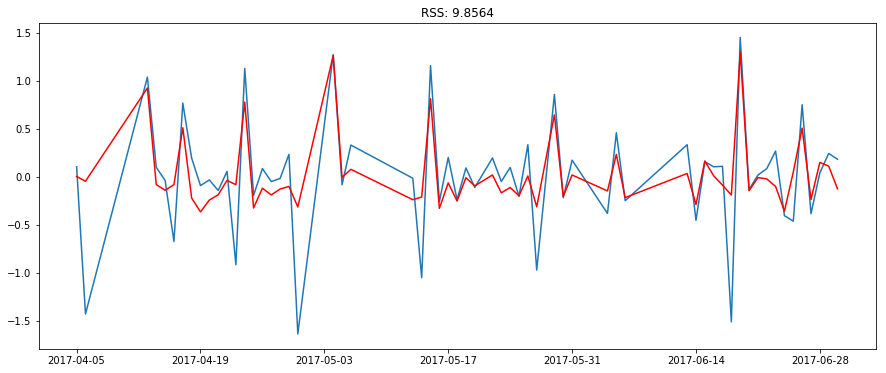

In [72]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_MA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

### combined models

Text(0.5,1,u'RSS: 9.8564')

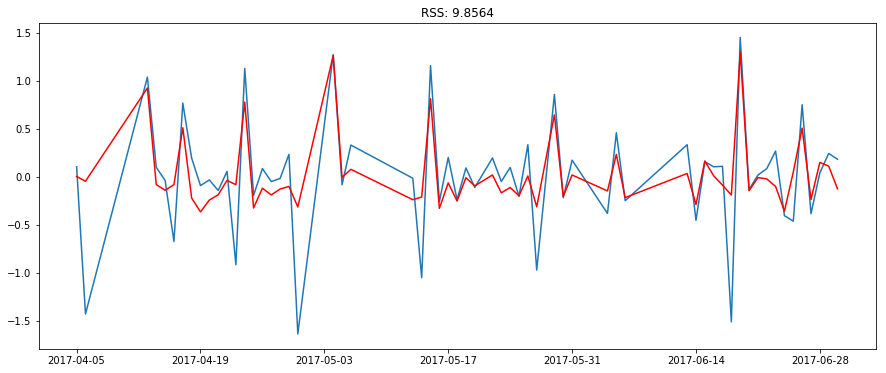

In [82]:
model = ARIMA(ts_log, order=(0, 1, 1))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

### 5. Predictions

In [83]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print predictions_ARIMA_diff.head()

Date
2017-04-05    0.003331
2017-04-06   -0.046902
2017-04-13    0.925040
2017-04-14   -0.081380
2017-04-15   -0.141046
dtype: float64


In [84]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print predictions_ARIMA_diff_cumsum.head()

Date
2017-04-05    0.003331
2017-04-06   -0.043571
2017-04-13    0.881469
2017-04-14    0.800089
2017-04-15    0.659044
dtype: float64


In [85]:
predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date
2017-04-04    4.158883
2017-04-05    4.162214
2017-04-06    4.115312
2017-04-13    5.040352
2017-04-14    4.958972
dtype: float64

Text(0.5,1,u'RMSE: 63.1916')

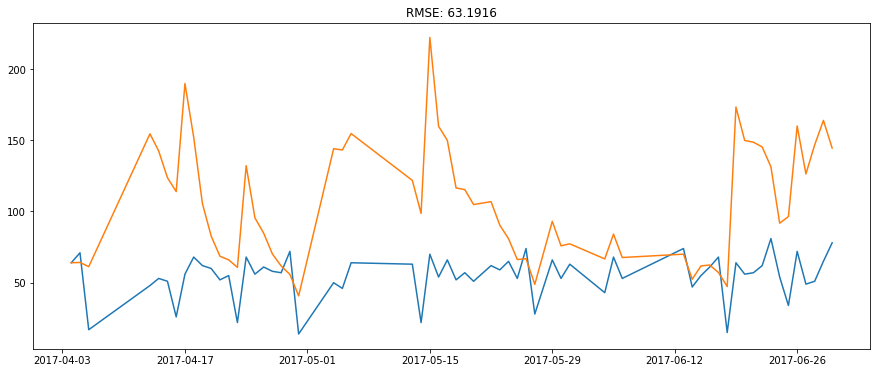

In [86]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(df)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-df)**2)/len(df)))

The RMSE is at 63% that's already bad so our predictions are way out of line here, more reaserch is needed to fine tune the methods and parameters.